In [31]:
!unzip "UCI HAR Dataset.zip"

Archive:  UCI HAR Dataset.zip
replace UCI HAR Dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/UCI HAR Dataset/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
  inflating: __MACOSX/UCI HAR Dataset/._README.txt  
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
  inflating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt  
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt  
  inflating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_y_test.txt  
  inflating: UCI HAR Datase

In [32]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [33]:
features = list()
with open("UCI HAR Dataset/features.txt") as f:
    for line in f:
        features.append(line.split()[1])

In [34]:
features

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [35]:
train_df = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace = True, header = None)

train_df.columns = features

train_df['Subject'] = pd.read_csv("UCI HAR Dataset/train/subject_train.txt", header = None, squeeze = True)

train_df["activity"] = pd.read_csv("UCI HAR Dataset/train/y_train.txt", header = None, squeeze = True)

<ipython-input-35-3fbd4e52a86e>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train_df['Subject'] = pd.read_csv("UCI HAR Dataset/train/subject_train.txt", header = None, squeeze = True)
<ipython-input-35-3fbd4e52a86e>:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train_df["activity"] = pd.read_csv("UCI HAR Dataset/train/y_train.txt", header = None, squeeze = True)


In [36]:
activity_mapping = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6:"LAYING"}

train_df['activity_label'] = train_df['activity'].map(activity_mapping)

train_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,activity,activity_label
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,2,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,2,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,2,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,2,WALKING_UPSTAIRS


In [37]:
test_df = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace = True, header=None)

test_df.columns = features

test_df['Subject'] = pd.read_csv("UCI HAR Dataset/test/subject_test.txt", header = None, squeeze = True)

test_df["activity"] = pd.read_csv("UCI HAR Dataset/test/y_test.txt", header = None, squeeze = True)

<ipython-input-37-869e1f86c959>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  test_df['Subject'] = pd.read_csv("UCI HAR Dataset/test/subject_test.txt", header = None, squeeze = True)
<ipython-input-37-869e1f86c959>:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  test_df["activity"] = pd.read_csv("UCI HAR Dataset/test/y_test.txt", header = None, squeeze = True)


In [38]:
activity_mapping = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6:"LAYING"}

test_df['activity_label'] = test_df['activity'].map(activity_mapping)
test_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Subject,activity,activity_label
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,2,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,2,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,2,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,2,WALKING_UPSTAIRS


In [39]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
X_test = test_df.drop(['Subject', 'activity', 'activity_label'], axis=1)
X_train = train_df.drop(['Subject', 'activity', 'activity_label'], axis=1)
y_train = train_df['activity'].values
y_test = test_df['activity'].values

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


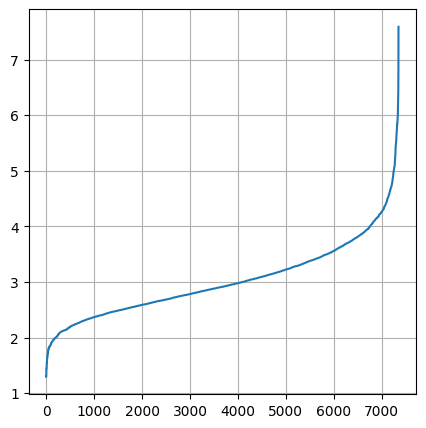

In [41]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

nearest_neighbors = NearestNeighbors(n_neighbors=2)
neighbors = nearest_neighbors.fit(X_train, y_train)
distances, indices = neighbors.kneighbors(X_train)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(5, 5))
plt.grid(True)
plt.plot(distances)


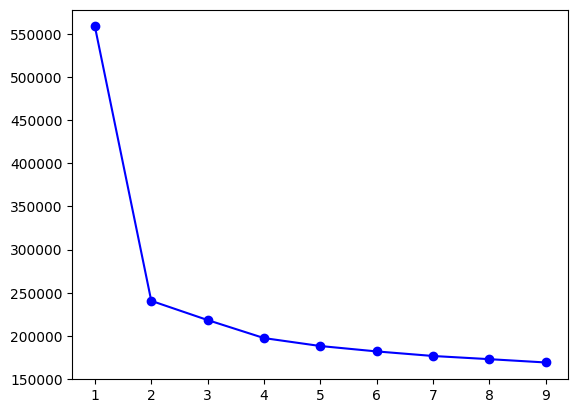

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.concat([X_train, X_test])

num_clusters = range(1, 10)

wcss = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


plt.plot(num_clusters, wcss, 'bo-')
plt.show()


In [43]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=4.5,min_samples=1200)
dbscan.fit(X_train,y_train)

DBSCAN(eps=4.5, min_samples=1200)

In [44]:
X_KMEANS = np.vstack([X_train, X_test])

In [45]:
kmeans = KMeans(n_clusters=6, n_init=100, random_state=12)
kmeans.fit(X_KMEANS)
cluster_labels = kmeans.labels_

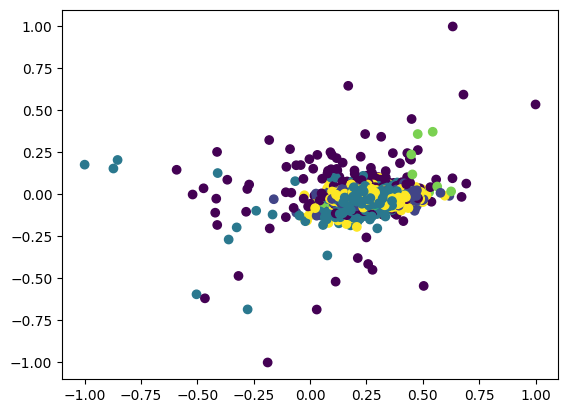

In [46]:
plt.scatter(X_KMEANS[:, 0], X_KMEANS[:, 1], c=cluster_labels)

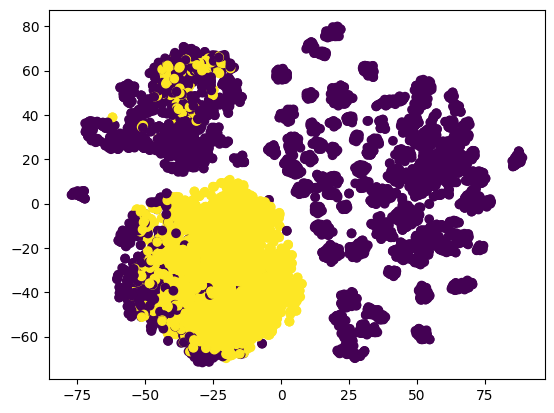

In [47]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne = model.fit_transform(X_train)
plt.scatter(tsne[:, 0], tsne[:, 1], c=dbscan.labels_)
plt.show()

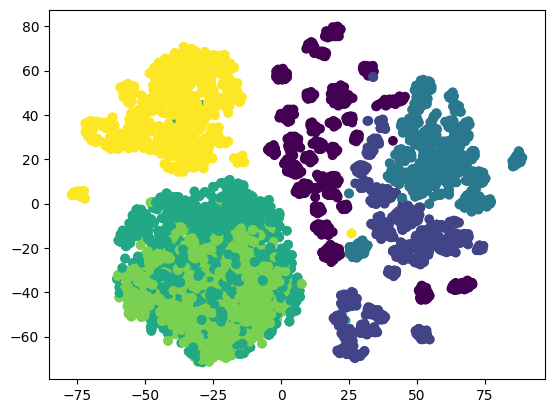

In [48]:
plt.scatter(tsne[:, 0], tsne[:, 1], c=y_train)
plt.show()

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PCAComponents = pca.fit_transform(X_train)
PCA_df = pd.DataFrame(data = PCAComponents, columns = ['pc1', 'pc2'])
PCA_df.head()

,pc1,pc2
0,-5.520280,-0.290277
1,-5.535350,-0.082530
2,-5.474988,0.287387
3,-5.677232,0.897032
4,-5.748749,1.162952


In [50]:
ydf = pd.DataFrame(y_train, columns=['Activity'])
df = pd.concat([PCA_df, ydf], axis = 1)
df

,pc1,pc2,Activity
0,-5.520280,-0.290277,5
1,-5.535350,-0.082530,5
2,-5.474988,0.287387,5
3,-5.677232,0.897032,5
4,-5.748749,1.162952,5
...,...,...,...
7347,6.253517,-2.636767,2
7348,5.782321,-2.437814,2
7349,5.857505,-3.081844,2
7350,5.421095,-3.426431,2


In [51]:
activity_mapping = {1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6:"LAYING"}
df['activity_label'] = df['Activity'].map(activity_mapping)
df.head(1000)

,pc1,pc2,Activity,activity_label
0,-5.520280,-0.290277,5,STANDING
1,-5.535350,-0.082530,5,STANDING
2,-5.474988,0.287387,5,STANDING
3,-5.677232,0.897032,5,STANDING
4,-5.748749,1.162952,5,STANDING
...,...,...,...,...
995,-5.046749,-0.170236,5,STANDING
996,-4.826513,-0.606785,5,STANDING
997,-4.913363,-0.466132,5,STANDING
998,-5.211512,-0.423915,5,STANDING


<Axes: xlabel='pc1', ylabel='pc2'>

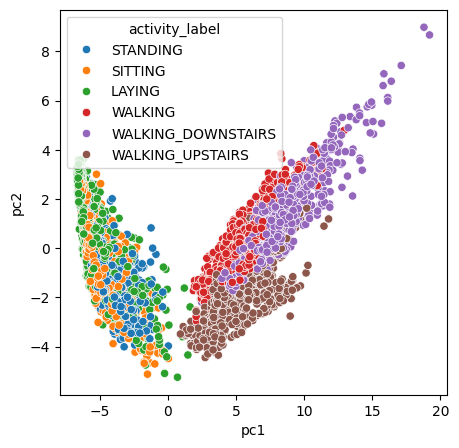

In [52]:
fig = plt.figure(figsize=(5, 5))
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df.iloc[:,3])

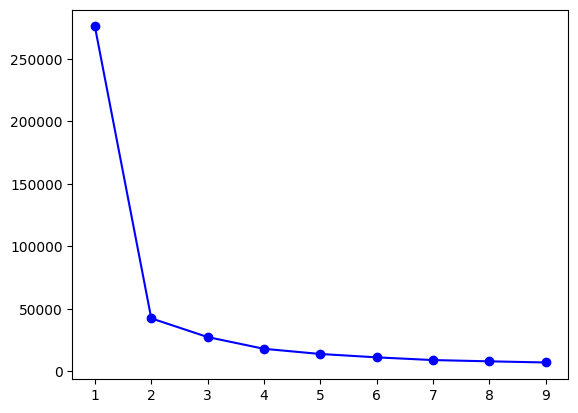

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = PCA_df

num_clusters = range(1, 10)

wcss = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(num_clusters, wcss, 'bo-')
plt.show()


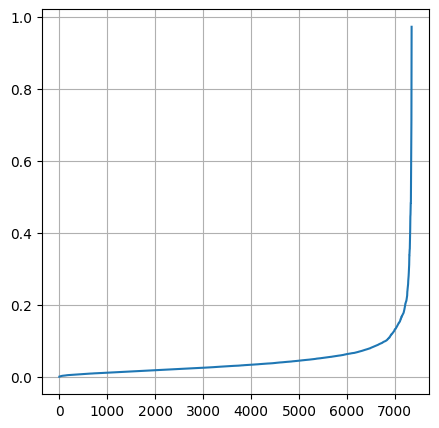

In [54]:
nearest_neighbors = NearestNeighbors(n_neighbors=2)
neighbors = nearest_neighbors.fit(PCA_df,y_train)
distances, indices = neighbors.kneighbors(PCA_df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(5, 5))
plt.grid(True)
plt.plot(distances)


In [55]:
from sklearn.cluster import DBSCAN
dbscan_withPCA=DBSCAN(eps=0.25,min_samples=50)
dbscan_withPCA.fit(PCA_df)

DBSCAN(eps=0.25, min_samples=50)

<Axes: xlabel='pc1', ylabel='pc2'>

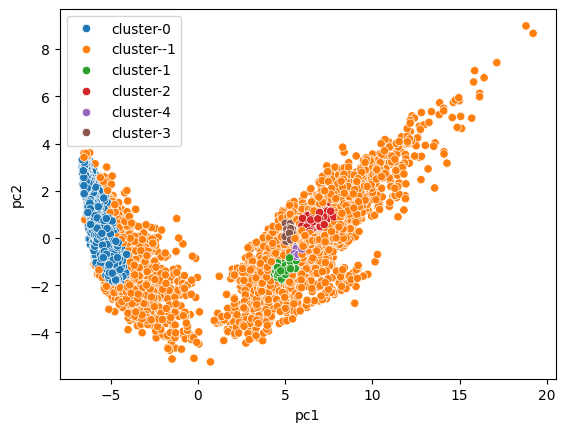

In [56]:
labels=dbscan_withPCA.labels_
sns.scatterplot(x=PCA_df.iloc[:,0], y=PCA_df.iloc[:,1], hue=["cluster-{}".format(x) for x in labels])

In [57]:
kmeans = KMeans(n_clusters=6, n_init=100, random_state=12)
kmeans.fit(PCA_df)
cluster_labels = kmeans.labels_

In [61]:
PCA_df

,pc1,pc2
0,-5.520280,-0.290277
1,-5.535350,-0.082530
2,-5.474988,0.287387
3,-5.677232,0.897032
4,-5.748749,1.162952
...,...,...
7347,6.253517,-2.636767
7348,5.782321,-2.437814
7349,5.857505,-3.081844
7350,5.421095,-3.426431


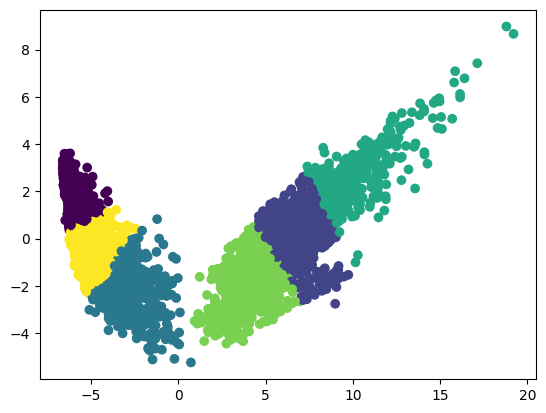

In [64]:
plt.scatter(data = PCA_df, x = "pc1", y= "pc2", c=cluster_labels)

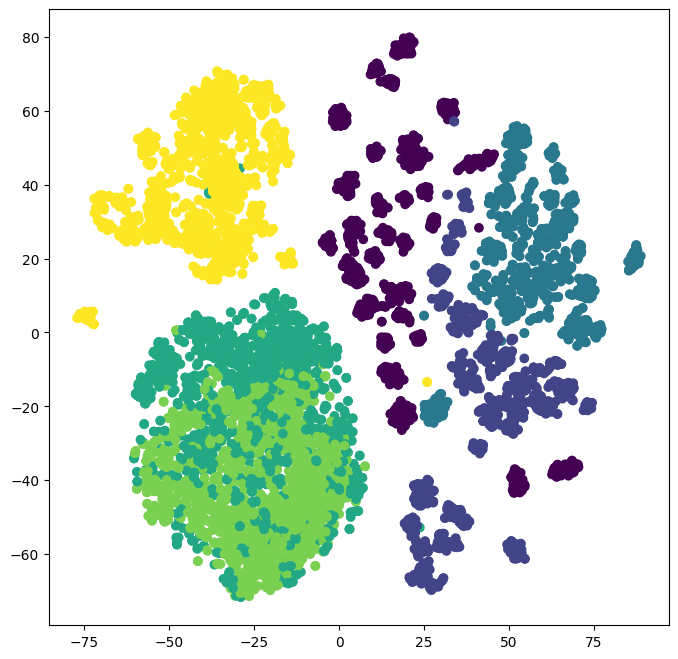

In [65]:
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne = model.fit_transform(X_train)
plt.figure(figsize=(8,8))
plt.scatter(tsne[:, 0], tsne[:, 1], c=y_train)
plt.show()

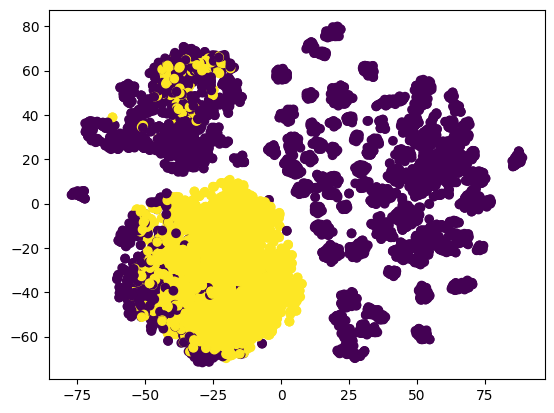

In [66]:
plt.scatter(tsne[:, 0], tsne[:, 1], c=dbscan.labels_)
plt.show()